RANTEST performs a randomisation test to compare two independent samples.  According to the null hypothesis of    no-difference, each outcome would have been the same regardless of which group the individual happened to be allocated to.  Therefore all N = n1 + n2 observations are pooled and, as in the actual experiment, divided at random into groups of size n1 and n2.  The fraction of randomisations that gives rise to a difference between the groups at least as large as that observed gives the P value.

In the binomial case, in which the measurement is the fraction of 'successes' in each sample (say r1 out of n1, and r2 out of n2) a 'success' is given a score of 1, 'failure' scores 0.
Randomisation test on binomial data could be done using as criterion: 
(1) number of successes in set 1 (r1) or 
(2) difference between the p=r/n values.
Both criteria give the same one-tail P value. Use of r1 as criterion is the direct Monte Carlo equivalent of summing the the exact Fisher test probabilities for the observed 2x2 table with those for all tables that depart further from the null hypothesis in the observed direction. A 2-tail probablilty can be found by doubling the one-tail value, at least if the displayed distribution is symmetrical. Use of (p1-p2) as criterion gives both one and two-tail     probabilities directly by seeing how many random allocations of the observations to groups of size n1 and n2 produce and absolute value of (p1-p2) at least as big as that observed.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#import sys
import math
import random

In [2]:
# Samples from treatment T1 and T2
T1 = [100, 108, 119, 127, 132, 135, 136] #, 164]
T2 = [122, 130, 138, 142, 152, 154, 176]

### Run randomisation tests

In [3]:
class RantestContinuous():
    def __init__(self, X, Y, are_paired=False):
        """ 
        Parameters
        ----------
        X : observations in first trial, list of floats
        Y : observations in second trial, list of floats
        are_paired : are observations paired, boolean
        """   
        self.X, self.Y = X, Y
        self.nx, self.ny = len(X), len(Y)
        self.are_paired = are_paired
        random.seed(1984)
        np.random.seed(1984)
            
    def run_rantest(self, nran, sampling='resample'):
        """Run randomisation"""
        self.nran = nran
        self.randiff = np.zeros(nran)
        self.dbar = np.mean(self.X) - np.mean(self.Y)
        allobs = np.concatenate([self.X, self.Y])
        if sampling == 'resample':
            for i in range(nran):
                random.shuffle(allobs)
                sy = sum(allobs[self.nx : ])
                self.randiff[i] = (sum(allobs) - sy) / float(self.nx) - sy / float(self.ny)
        elif sampling == 'bootstrap':
            for i in range(nran):
                x = random.choices(allobs, k=self.nx)
                y = random.choices(allobs, k=self.ny)
                self.randiff[i] = sum(x) / float(self.nx) - sum(y) / float(self.ny)
        self.n2tail = self.randiff[np.fabs(self.randiff) >= math.fabs(self.dbar)].size
        self.p2tail = self.n2tail / float(self.nran)
                
    def __repr__(self):
        return ('Rantest:  {0:d} randomisations'.format(self.nran) +
        '\nTwo-tailed P = {0:.3f}'.format(self.p2tail) + 
        '\t(greater than or equal in absolute value to observed)')

In [4]:
nran = 50000
rnt = RantestContinuous(T1, T2, are_paired=False)    
rnt.run_rantest(nran)
print(rnt)

Rantest:  50000 randomisations
Two-tailed P = 0.021	(greater than or equal in absolute value to observed)


Red line: observed difference


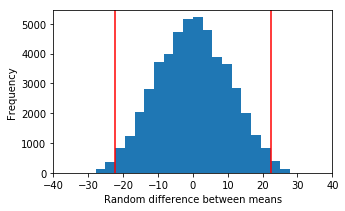

In [5]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(rnt.randiff, 20)
ax.axvline(x=rnt.dbar, color='r')
ax.axvline(x=-rnt.dbar, color='r')
ax.set_xlim([-40, 40])
ax.set_ylabel("Frequency")
ax.set_xlabel('Random difference between means')
print('Red line: observed difference')

In [6]:
rnt.run_rantest(nran, sampling='bootstrap')
print(rnt)

Rantest:  50000 randomisations
Two-tailed P = 0.024	(greater than or equal in absolute value to observed)


Red line: observed difference


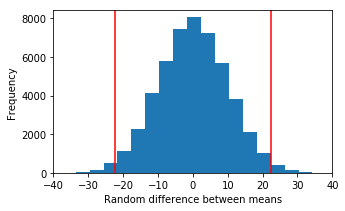

In [7]:
fig, ax  = plt.subplots(1,1, figsize=(5,3))
ax.hist(rnt.randiff, 20)
ax.axvline(x=rnt.dbar, color='r')
ax.axvline(x=-rnt.dbar, color='r')
ax.set_xlim([-40, 40])
ax.set_ylabel("Frequency")
ax.set_xlabel('Random difference between means')
print('Red line: observed difference')